<a href="https://colab.research.google.com/github/gabrielvieiraf/ProjetosPython/blob/master/GoogleColab/MachineLearning/Machine_Learning03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Iniciando com Machine Learning 03**

## **Exemplo 04**

In [1]:
import pandas as pd

# Importando dados
url = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(url)
dados.head()

# Renomeando Colunas
dados.rename(columns= {'mileage_per_year':'milhas_por_ano',
             'model_year':'ano_modelo',
             'price':'preco'}, inplace= True)

# Traduzindo Tabela
dados['vendido'] = dados.sold.map({'yes':'1','no':'0'})

# Excluindo colunas
del dados['sold'],dados['Unnamed: 0']
dados.head()

,milhas_por_ano,ano_modelo,preco,vendido
0,21801,2000,30941.02,1
1,7843,1998,40557.96,1
2,7109,2006,89627.50,0
3,26823,2015,95276.14,0
4,7935,2014,117384.68,1


In [2]:
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_modelo'] = ano_atual - dados['ano_modelo']

del dados['ano_modelo']
dados.head()

dados['km_por_ano'] = dados['milhas_por_ano'] * 1.60934
del dados['milhas_por_ano']
dados.head()

,preco,vendido,idade_modelo,km_por_ano
0,30941.02,1,20,35085.22134
1,40557.96,1,22,12622.05362
2,89627.50,0,14,11440.79806
3,95276.14,0,5,43167.32682
4,117384.68,1,6,12770.11290


In [3]:
# Características
x = dados[['preco','idade_modelo','km_por_ano']]

# Classe
y = dados[['vendido']]

# Importando sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

# Ignorar warnings 
import warnings
warnings.filterwarnings("ignore")

# Cria semente para números aleatórios
SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split (x, y,
                                                         test_size= 0.25,
                                                         stratify = y)

print('Treinaremos com %d elementos e testaremos com %d elementos.' % (len(treino_x), len(teste_x)))

# Criando modelo
modelo = LinearSVC()

# Treinando o robô
modelo.fit(treino_x,treino_y.values.ravel())
previsoes = modelo.predict(teste_x)

# Método 02 para taxa de acerto
taxa_de_acerto = accuracy_score(teste_y, previsoes)*100

print("O acerto foi de: %.2f" % taxa_de_acerto,'%' )

Treinaremos com 7500 elementos e testaremos com 2500 elementos.
O acerto foi de: 58.00 %


## Criando baseline

In [4]:
from sklearn.dummy import DummyClassifier
dummy_mais_frequente = DummyClassifier()

# Treinando o robô dummy
dummy_mais_frequente .fit(treino_x,treino_y.values.ravel())

# Outro método para verificar o acerto
taxa_de_acerto = dummy_mais_frequente.score(teste_x,teste_y)*100
print("O acerto dummy foi de: %.2f %%" % taxa_de_acerto )

O acerto dummy foi de: 52.44 %


In [5]:
# Importando sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Cria semente para números aleatórios
SEED = 5
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split (x, y,
                                                         test_size= 0.25,
                                                         stratify = y)

print('Treinaremos com %d elementos e testaremos com %d elementos.' % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)

# Tira a média e divide pelo desvio padrão
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

# Treinando modelo
modelo = SVC()
modelo.fit(treino_x,treino_y)

previsoes = modelo.predict(teste_x)

# Método 02 para taxa de acerto
taxa_de_acerto = accuracy_score(teste_y, previsoes)*100

print("O acerto foi de: %.2f" % taxa_de_acerto,'%' )

Treinaremos com 7500 elementos e testaremos com 2500 elementos.
O acerto foi de: 77.48 %


## **Decision Tree Classifier**

In [6]:
# Importando sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Cria semente para números aleatórios
SEED = 5
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split (x, y,
                                                         test_size= 0.25,
                                                         stratify = y)

print('Treinaremos com %d elementos e testaremos com %d elementos.' % (len(treino_x), len(teste_x)))

# Com a Árvore de decisão não precisamos reescalar

# Treinando modelo
modelo = DecisionTreeClassifier(max_depth=4)
modelo.fit(raw_treino_x,treino_y)

previsoes = modelo.predict(raw_teste_x)

# Método 02 para taxa de acerto
taxa_de_acerto = accuracy_score(teste_y, previsoes)*100

print("O acerto foi de: %.2f" % taxa_de_acerto,'%' )

Treinaremos com 7500 elementos e testaremos com 2500 elementos.
O acerto foi de: 79.28 %


In [7]:
!pip install graphviz

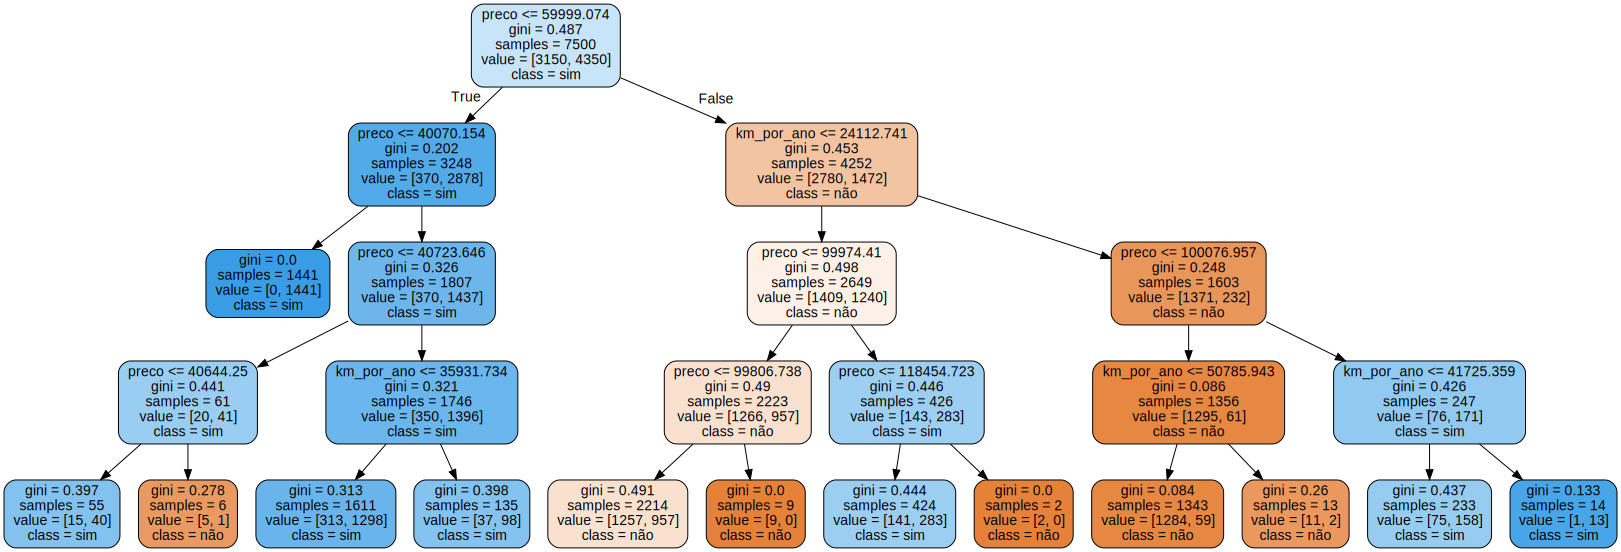

In [8]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns 

dot_data =  export_graphviz(modelo, out_file= None,
                            feature_names= features,
                            filled = True, rounded=True,class_names=['não','sim']
                            )

# Visualizando Árvore de decisão
grafico = graphviz.Source(dot_data)
grafico